In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [2]:
end  = dt.datetime.now()
start = end - dt.timedelta(days=5000)
df = web.DataReader('AAPL', 'stooq',start,end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-08,178.350,180.239,177.79,178.18,65602066.0
2023-09-07,175.180,178.210,173.54,177.56,112488803.0
2023-09-06,188.400,188.850,181.47,182.91,81755816.0
2023-09-05,188.280,189.980,187.61,189.70,45280027.0
2023-09-01,189.485,189.920,188.28,189.46,45766503.0


In [3]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
2009-12-31,6.48781,6.49479,6.41065,6.41503,4.125632e+08


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2023-09-08,178.350,180.239,177.79,178.18,65602066.0
1,2023-09-07,175.180,178.210,173.54,177.56,112488803.0
2,2023-09-06,188.400,188.850,181.47,182.91,81755816.0
3,2023-09-05,188.280,189.980,187.61,189.70,45280027.0
4,2023-09-01,189.485,189.920,188.28,189.46,45766503.0


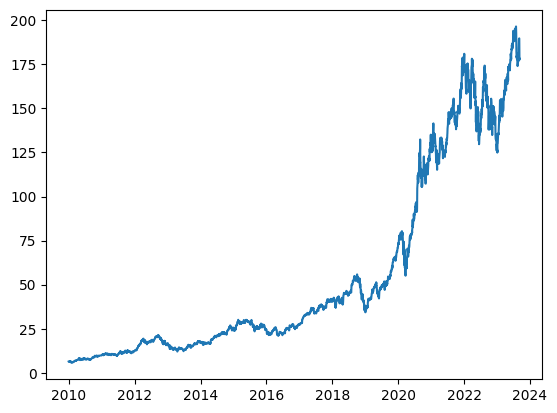

In [5]:
plt.plot(df.Date,df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3440    6.937091
3441    6.921914
3442    6.908978
3443    6.897006
3444    6.886838
Name: Close, Length: 3445, dtype: float64

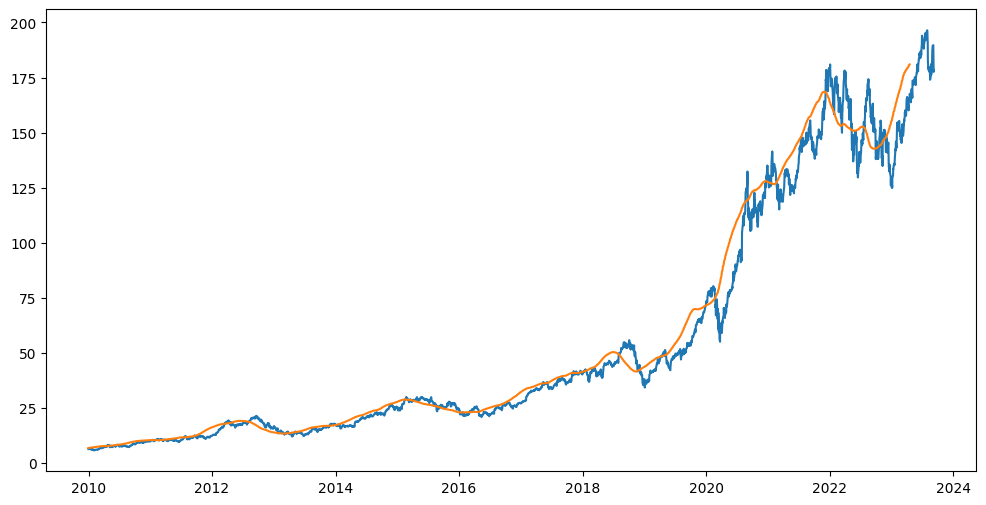

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,ma100)

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3440    7.517503
3441    7.502498
3442    7.487859
3443    7.473319
3444    7.456991
Name: Close, Length: 3445, dtype: float64

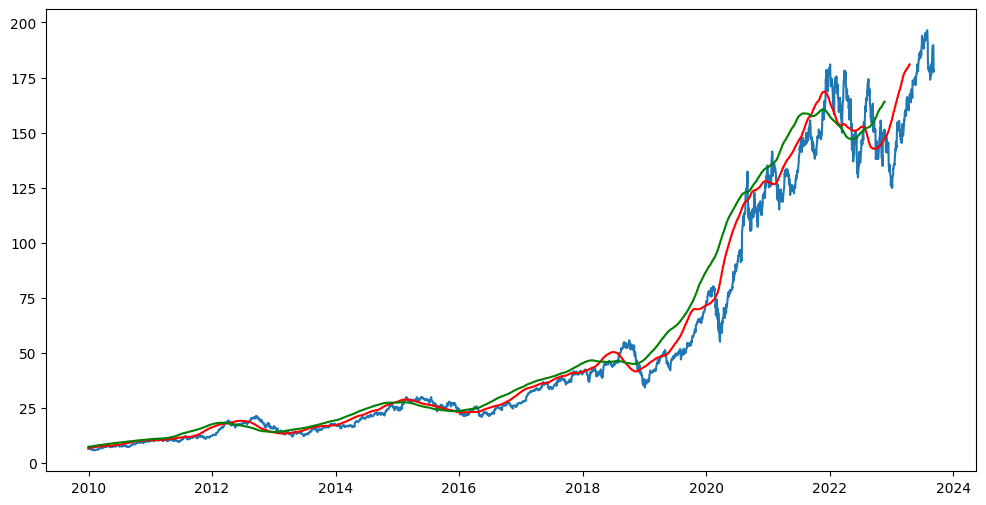

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,ma100,'r')
plt.plot(df.Date,ma200,'g')

In [48]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_train_date = pd.DataFrame(df['Date'][0:int(len(df)*0.7)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
data_test_date = pd.DataFrame(df['Date'][int(len(df)*0.7):int(len(df))])
print(data_train.shape, data_test.shape)
data_test.head()

(2411, 1) (1034, 1)


,Close
2411,16.7559
2412,16.4598
2413,16.2325
2414,16.1387
2415,16.0181


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_arr = scaler.fit_transform(data_train)
data_train_arr

array([[0.89853608],
       [0.89509286],
       [0.92480451],
       ...,
       [0.00476719],
       [0.00326106],
       [0.00327217]])

In [13]:
x_train = []
y_train = []

for i in range(100,data_train_arr.size):
  x_train.append(data_train_arr[i-100:i])
  y_train.append(data_train_arr[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape,y_train.shape

((2311, 100, 1), (2311,))

In [14]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [15]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
73/73 [==============================] - 37s 424ms/step - loss: 0.0277
Epoch 2/50
73/73 [==============================] - 28s 385ms/step - loss: 0.0062
Epoch 3/50
73/73 [==============================] - 29s 400ms/step - loss: 0.0053
Epoch 4/50
73/73 [==============================] - 30s 418ms/step - loss: 0.0051
Epoch 5/50
73/73 [==============================] - 28s 386ms/step - loss: 0.0051
Epoch 6/50
73/73 [==============================] - 30s 402ms/step - loss: 0.0044
Epoch 7/50
73/73 [==============================] - 31s 428ms/step - loss: 0.0042
Epoch 8/50
73/73 [==============================] - 30s 411ms/step - loss: 0.0043
Epoch 9/50
73/73 [==============================] - 28s 383ms/step - loss: 0.0040
Epoch 10/50
73/73 [==============================] - 31s 423ms/step - loss: 0.0034
Epoch 11/50
73/73 [==============================] - 30s 418ms/step - loss: 0.0037
Epoch 12/50
73/73 [==============================] - 28s 382ms/step - loss: 0.0034
Epoch 13/50
7

In [41]:
model.save('keras_model.h5')

In [18]:
data_test.head()

,Close
2411,16.7559
2412,16.4598
2413,16.2325
2414,16.1387
2415,16.0181


In [19]:
past_100_days = data_train.tail(100)

In [26]:
final_df = past_100_days.append(data_test, ignore_index=True)

<ipython-input-26-b24ca86cf791>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test, ignore_index=True)


In [21]:
final_df.head()

,Close
0,20.9630
1,20.8424
2,20.8504
3,20.7188
4,20.5085


In [22]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.96776575],
       [0.96004489],
       [0.96055705],
       ...,
       [0.04352873],
       [0.04281362],
       [0.03639942]])

In [23]:
input_data.shape

(1134, 1)

In [27]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [28]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((1034, 100, 1), (1034,))

In [32]:
y_predicted = model.predict(x_test)
y_predicted.shape

33/33 [==============================] - 5s 158ms/step


(1034, 1)

In [45]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

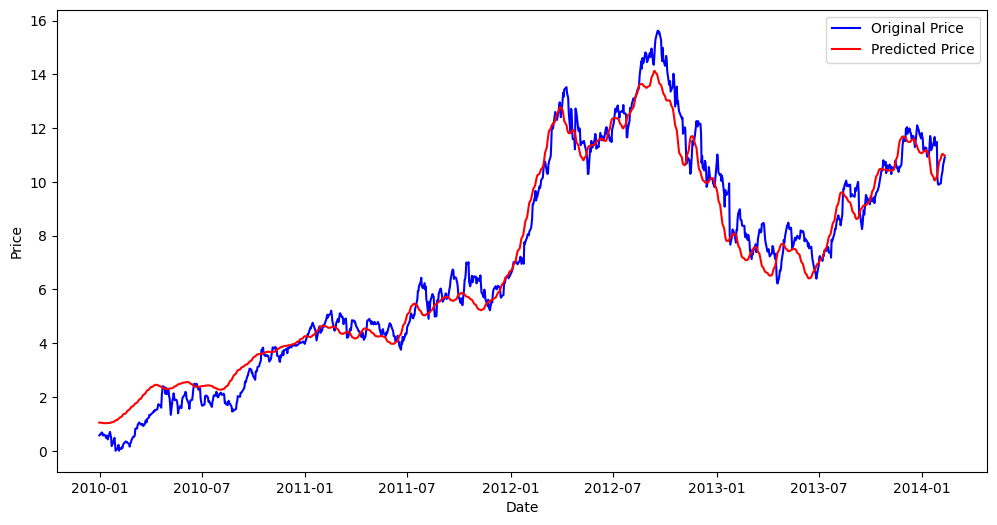

In [51]:
plt.figure(figsize=(12,6))
plt.plot(data_test_date,y_test,'b',label='Original Price')
plt.plot(data_test_date,y_predicted,'r',label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()